In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

In [2]:
appearances=pd.read_excel("appearances.xlsx")
appearances.head()

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3


In [3]:
events=pd.read_excel("game_events.xlsx")
events.head()

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0


In [4]:
lineups=pd.read_excel("game_lineups.xlsx")

lineups.head()

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back


In [5]:
games=pd.read_excel("games.xlsx")
games.head()

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league


In [6]:
games['competition_type'].value_counts()

competition_type
domestic_league      2789
international_cup     245
domestic_cup          226
other                   8
Name: count, dtype: int64

In [7]:
player=pd.read_excel("players (1).xlsx")
player.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.


In [8]:
print("appearances:",appearances.shape)
print("events",events.shape)
print("lineups",lineups.shape)
print("games",games.shape)
print("player",player.shape)

appearances: (3568, 11)
events (1849, 9)
lineups (219, 8)
games (3268, 20)
player (152, 15)


In [9]:
#  games, game_lineups, game_events, appearances  and players are  the given df's


merged_df1 = appearances.merge(events, on=['game_id', 'player_id', 'date'], how='outer')
#merged_df1

In [10]:
merged_df1.shape 


(4449, 17)

In [11]:
#  Merge merged_df1 with lineups on game_id and player_id

merged_df2 = merged_df1.merge(lineups, on=['game_id', 'player_id'], how='outer')
#merged_df2

In [12]:
merged_df2.shape

(4594, 23)

In [13]:
# Merge merged_df2 with appearances on game_id and player_id

merged_df3 = merged_df2.merge(games, on=['game_id','date'], how='outer')
#merged_df3

In [14]:
merged_df3.shape

(4594, 41)

In [15]:
merged_df4 = merged_df3.merge(player, on='player_id', how='outer')
#merged_df4

In [16]:
merged_df4['contract_expiration_date'].isnull().sum()

1438

In [17]:
merged_df4['round'].isnull().sum()

928

In [18]:
merged_df4['sub_position'].isnull().sum()

0

In [19]:
merged_df4['round'].unique()

array(['1. Matchday', 'Second Round 1st leg', '2. Matchday',
       'Second Round 2nd leg', '3. Matchday', '4. Matchday',
       '5. Matchday', '6. Matchday', '7. Matchday', '8. Matchday',
       '9. Matchday', '10. Matchday', '11. Matchday', '12. Matchday',
       '13. Matchday', '16. Matchday', '17. Matchday', '18. Matchday',
       '19. Matchday', '20. Matchday', '29. Matchday', '30. Matchday',
       '31. Matchday', '33. Matchday', 'Final', '34. Matchday',
       'Qualifying Round 1st leg', 'Qualifying Round 2nd leg', 'group L',
       'Second Round', '14. Matchday', '15. Matchday', 'Round of 16',
       'Quarter-Finals', '21. Matchday', '22. Matchday', '24. Matchday',
       '25. Matchday', '26. Matchday', '27. Matchday', 'last 16 1st leg',
       '28. Matchday', 'last 16 2nd leg', 'Semi-Finals',
       'Quarter-Finals 1st leg', 'Quarter-Finals 2nd leg', '32. Matchday',
       'Third Round', '3rd round 1st leg', '23. Matchday',
       '3rd round 2nd leg', nan, 'Semi-Finals 1st Leg

In [20]:
merged_df4.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'minute', 'type_x', 'description',
       'player_in_id', 'player_assist_id', 'game_lineups_id', 'type_y',
       'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],

In [21]:

merged_df4.shape

(4654, 55)

In [22]:
merged_df4.contract_expiration_date.unique()

<DatetimeArray>
['2024-12-31 00:00:00',                 'NaT', '2025-06-30 00:00:00',
 '2023-12-31 00:00:00', '2024-06-30 00:00:00', '2026-12-31 00:00:00',
 '2023-11-30 00:00:00', '2025-12-31 00:00:00', '2027-06-30 00:00:00',
 '2026-05-31 00:00:00', '2028-06-30 00:00:00', '2026-06-30 00:00:00',
 '2023-06-30 00:00:00', '2023-05-31 00:00:00', '2027-12-31 00:00:00',
 '2024-05-31 00:00:00']
Length: 16, dtype: datetime64[ns]

In [23]:
print(merged_df4.columns)

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'minute', 'type_x', 'description',
       'player_in_id', 'player_assist_id', 'game_lineups_id', 'type_y',
       'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],

In [24]:
## final df

df_football=merged_df4.copy()
df_football

,appearance_id,game_id,player_id,date,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224728_119169,2224728.0,119169,2012-07-13,Aron Johannsson,DK1,0.0,0.0,0.0,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31,CAA Stellar
1,2232104_119169,2232104.0,119169,2012-07-19,Aron Johannsson,ELQ,0.0,0.0,0.0,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31,CAA Stellar
2,2224568_119169,2224568.0,119169,2012-07-23,Aron Johannsson,DK1,0.0,0.0,0.0,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31,CAA Stellar
3,2244352_119169,2244352.0,119169,2012-07-26,Aron Johannsson,ELQ,0.0,0.0,0.0,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31,CAA Stellar
4,2224567_119169,2224567.0,119169,2012-07-29,Aron Johannsson,DK1,0.0,0.0,0.0,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31,CAA Stellar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,NaN,NaN,605144,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,United States,2001-07-28,Attacking Midfield,Midfield,both,180.0,2000000.0,6000000.0,2024-12-31,Octagon
4650,NaN,NaN,623872,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,United States,2003-02-21,Attacking Midfield,Midfield,right,183.0,75000.0,75000.0,NaT,PRO FC
4651,NaN,NaN,467437,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Germany,2002-05-28,Attacking Midfield,Midfield,right,187.0,5000000.0,5000000.0,2024-06-30,ROOF
4652,NaN,NaN,103559,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Norway,1990-10-02,Central Midfield,Midfield,right,184.0,400000.0,1400000.0,2024-05-31,NaN


In [25]:
df_football.shape

(4654, 55)

In [26]:
df_football.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'minute', 'type_x', 'description',
       'player_in_id', 'player_assist_id', 'game_lineups_id', 'type_y',
       'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],

In [27]:
for i in df_football.columns:
    print(i,df_football[i].value_counts())

appearance_id appearance_id
2224542_119169    5
2342362_119169    4
2342350_119169    4
2250333_39378     3
3058474_72519     3
                 ..
2486656_31642     1
2486666_31642     1
2517322_31642     1
2486669_31642     1
3431983_478940    1
Name: count, Length: 3568, dtype: int64
game_id game_id
2224542.0    5
2250434.0    4
2342350.0    4
2231420.0    4
2299197.0    4
            ..
2578191.0    1
2578214.0    1
2578232.0    1
2578278.0    1
3869321.0    1
Name: count, Length: 4039, dtype: int64
player_id player_id
315779    235
49723     214
31041     207
124732    203
31642     177
         ... 
170540      1
392710      1
971613      1
526111      1
670096      1
Name: count, Length: 152, dtype: int64
date date
2012-11-03    16
2020-09-12    12
2015-11-28    11
2013-11-10    11
2018-12-22    11
              ..
2016-11-24     1
2016-12-08     1
2016-12-11     1
2016-12-22     1
2023-05-20     1
Name: count, Length: 1634, dtype: int64
player_name_x player_name_x
Fabian Johnso

In [28]:
df_football.isnull().sum()

appearance_id                   932
game_id                          60
player_id                         0
date                            205
player_name_x                   932
competition_id_x                932
yellow_cards                    932
red_cards                       932
goals                           932
assists                         932
minutes_played                  932
game_event_id                  2805
minute                         2805
type_x                         2805
description                    3738
player_in_id                   3499
player_assist_id               4514
game_lineups_id                4419
type_y                         4419
number                         4419
player_name_y                  4419
team_captain                   4419
position_x                     4419
competition_id_y                928
season                          928
round                           928
home_club_goals                 928
away_club_goals             

In [29]:
# drop the above 30% of null values and drop id columns because of no need id columns for ML Algorithams(30% of rows (4654 rows))

df_football.drop(['game_event_id','game_id','appearance_id', 'player_id','competition_id_x','competition_id_y','current_club_id','minute', 'type_x' ,'description' ,'player_in_id' ,'player_assist_id' ,'game_lineups_id','type_y' ,'number','player_name_y',
 'team_captain','position_x','home_club_formation', 'away_club_formation','home_club_position','away_club_position'],axis=1,inplace=True)

In [30]:
cate_df=df_football.select_dtypes(exclude="number")
print("categorial columns are:\n",cate_df.columns.to_list())

categorial columns are:
 ['date', 'player_name_x', 'round', 'home_club_manager_name', 'away_club_manager_name', 'stadium', 'referee', 'home_club_name', 'away_club_name', 'aggregate', 'competition_type', 'name', 'player_code', 'country_of_birth', 'date_of_birth', 'sub_position', 'position_y', 'foot', 'contract_expiration_date', 'agent_name']


In [31]:
conti_df=df_football.select_dtypes(include="number")
print("numerical columns are:\n",conti_df.columns.to_list())

numerical columns are:
 ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'season', 'home_club_goals', 'away_club_goals', 'attendance', 'last_season', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']


In [32]:
df_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4654 entries, 0 to 4653
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         4449 non-null   datetime64[ns]
 1   player_name_x                3722 non-null   object        
 2   yellow_cards                 3722 non-null   float64       
 3   red_cards                    3722 non-null   float64       
 4   goals                        3722 non-null   float64       
 5   assists                      3722 non-null   float64       
 6   minutes_played               3722 non-null   float64       
 7   season                       3726 non-null   float64       
 8   round                        3726 non-null   object        
 9   home_club_goals              3726 non-null   float64       
 10  away_club_goals              3726 non-null   float64       
 11  home_club_manager_name       3720 non-null 

In [33]:
df_football.describe()

,date,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,away_club_goals,attendance,last_season,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
count,4449,3722.000000,3722.000000,3722.000000,3722.000000,3722.000000,3726.000000,3726.000000,3726.000000,3590.000000,4654.000000,4654,4601.000000,3.369000e+03,4.650000e+03,3216
mean,2017-03-29 02:22:44.261632,0.134068,0.003224,0.145352,0.076303,70.705803,2015.420827,1.651100,1.328771,29626.813928,2019.355608,1992-03-28 15:23:16.991835008,183.707020,5.634921e+06,1.002625e+07,2025-06-01 13:59:33.134328320
min,2012-07-13 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,0.000000,0.000000,300.000000,2012.000000,1971-05-18 00:00:00,162.000000,7.500000e+04,5.000000e+04,2023-05-31 00:00:00
25%,2014-03-30 00:00:00,0.000000,0.000000,0.000000,0.000000,57.000000,2013.000000,1.000000,0.000000,14096.250000,2016.000000,1987-12-11 00:00:00,178.000000,5.000000e+05,2.500000e+06,2024-06-30 00:00:00
50%,2017-03-04 00:00:00,0.000000,0.000000,0.000000,0.000000,90.000000,2016.000000,1.000000,1.000000,27080.500000,2019.000000,1992-11-19 00:00:00,184.000000,1.000000e+06,5.000000e+06,2024-12-31 00:00:00
75%,2019-09-03 00:00:00,0.000000,0.000000,0.000000,0.000000,90.000000,2018.000000,2.000000,2.000000,43301.500000,2023.000000,1997-12-24 00:00:00,189.000000,7.000000e+06,1.000000e+07,2025-12-31 00:00:00
max,2023-11-12 00:00:00,2.000000,1.000000,4.000000,2.000000,120.000000,2020.000000,9.000000,9.000000,81365.000000,2023.000000,2004-06-30 00:00:00,204.000000,3.000000e+07,6.000000e+07,2028-06-30 00:00:00
std,NaN,0.350873,0.056697,0.445457,0.275454,29.856833,2.495319,1.413685,1.280547,19690.418346,3.515355,NaN,6.330723,8.245985e+06,1.397741e+07,NaN


In [34]:
df_football.isnull().sum()

date                            205
player_name_x                   932
yellow_cards                    932
red_cards                       932
goals                           932
assists                         932
minutes_played                  932
season                          928
round                           928
home_club_goals                 928
away_club_goals                 928
home_club_manager_name          934
away_club_manager_name          934
stadium                         928
attendance                     1064
referee                         932
home_club_name                 1054
away_club_name                  996
aggregate                       928
competition_type                928
name                              0
last_season                       0
player_code                       0
country_of_birth                  0
date_of_birth                     0
sub_position                      0
position_y                        0
foot                        

In [35]:
# missing value treatment in numerical columns column

for col in conti_df:
    if col in df_football.columns:
        df_football[col] = conti_df[col].fillna(conti_df[col].median())


In [36]:
# missing value treatment in categorial column

for cols in cate_df:
    if cols in df_football.columns:
        df_football[cols] = cate_df[cols].fillna('Not Available')

In [37]:
df_football.isnull().sum()

date                           0
player_name_x                  0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position_y                     0
foot                           0
height_in_cm                   0
market_value_in_eur            0
highest_ma

In [38]:
df_football.shape

(4654, 33)

# not doing the OUTlIER TREATMENT  because of less numerical columns and it's real time dataset

In [39]:
#df_football['home_club_formation', 'away_club_formation'].value_counts()

In [40]:
#df_football.drop(['away_club_formation'], axis=1, inplace=True)

In [41]:
#df_football.drop(['home_club_formation'],axis=1,inplace=True) # These columns having only nan values

In [42]:
#nan_columns=conti_df[['home_club_formation','away_club_formation']]                  
#df_football=df_football.drop(columns=nan_columns)

In [43]:
#df_football["description"]=df_football["description"].str.replace(",","")

In [44]:
# saving the file 
#df_football.to_excel("FootBall_Data_Merged_Cleaned_ML.xlsx")


In [45]:
df_football1 =df_football.copy()

In [46]:
# EDA Analysis
df_football

,date,player_name_x,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2012-07-13 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,90.0,2012.0,1. Matchday,1.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
1,2012-07-19 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,74.0,2012.0,Second Round 1st leg,1.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
2,2012-07-23 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,73.0,2012.0,2. Matchday,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
3,2012-07-26 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,43.0,2012.0,Second Round 2nd leg,3.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
4,2012-07-29 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,56.0,2012.0,3. Matchday,2.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,United States,2001-07-28,Attacking Midfield,Midfield,both,180.0,2000000.0,6000000.0,2024-12-31 00:00:00,Octagon
4650,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,United States,2003-02-21,Attacking Midfield,Midfield,right,183.0,75000.0,75000.0,Not Available,PRO FC
4651,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,Germany,2002-05-28,Attacking Midfield,Midfield,right,187.0,5000000.0,5000000.0,2024-06-30 00:00:00,ROOF
4652,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,Norway,1990-10-02,Central Midfield,Midfield,right,184.0,400000.0,1400000.0,2024-05-31 00:00:00,Not Available


In [47]:
df_football.columns

Index(['date', 'player_name_x', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

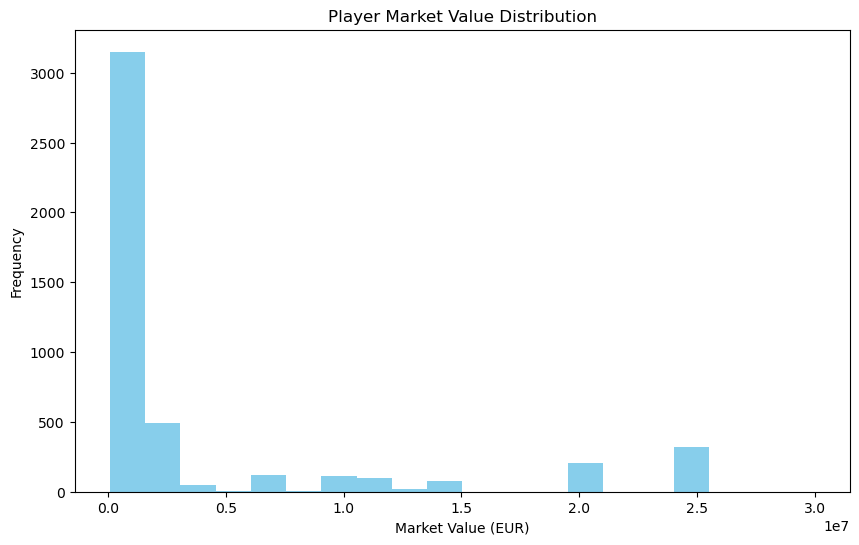

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df_football['market_value_in_eur'], bins=20, color='skyblue')
plt.title('Player Market Value Distribution')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Frequency')
plt.show()

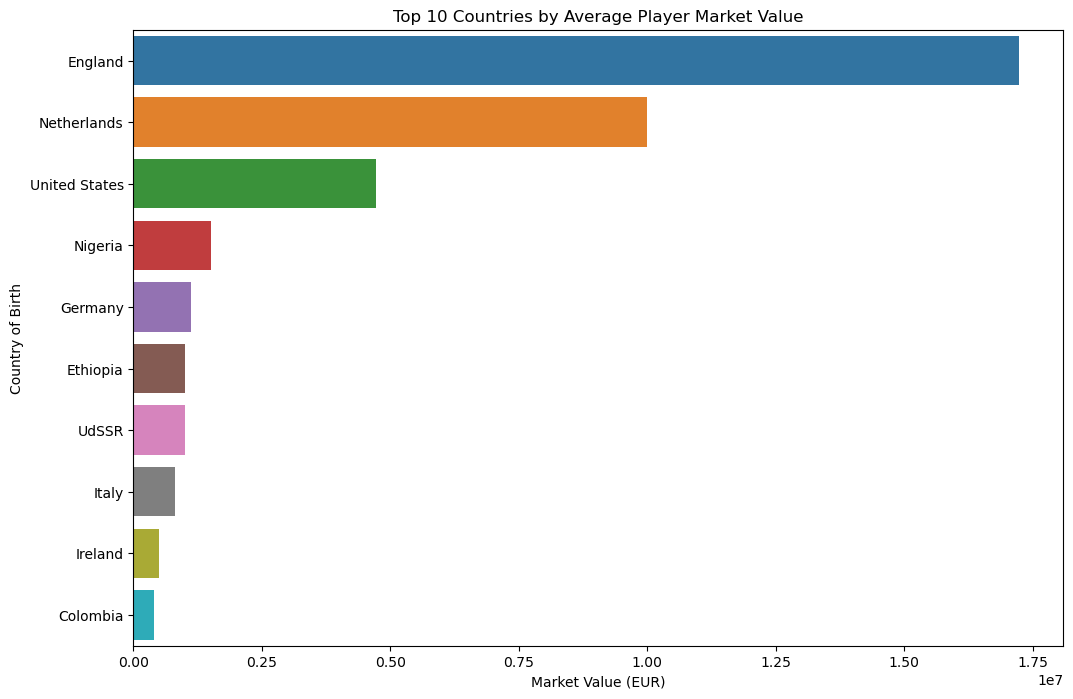

In [49]:
# Average market value per country
market_value_country = df_football.groupby('country_of_birth')['market_value_in_eur'].mean().reset_index()
market_value_country = market_value_country.sort_values(by='market_value_in_eur', ascending=False).head(10) 

#print(market_value_country)

# Visualize
plt.figure(figsize=(12,8))
sns.barplot(x='market_value_in_eur', y='country_of_birth', data=market_value_country)
plt.title('Top 10 Countries by Average Player Market Value')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Country of Birth')
plt.show()


               stadium    attendance
208       Old Trafford  75112.100000
241  SIGNAL IDUNA PARK  74543.409091
244  Santiago Bernabeu  67739.000000
11       Allianz Arena  66546.078125
257   Spotify Camp Nou  61768.500000


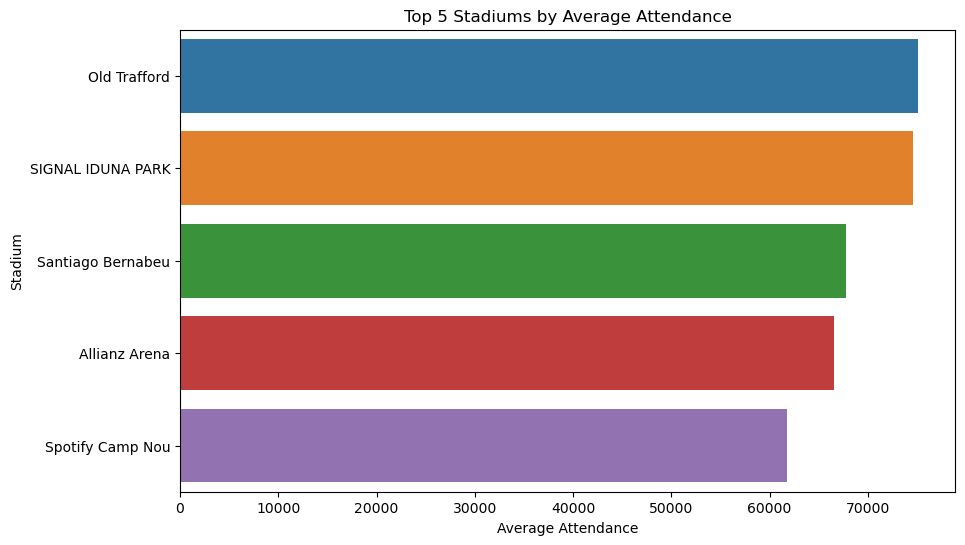

In [50]:
#ATTENDANCE & STADIUM ANALYSIS

# Calculate average attendance per stadium
stadium_attendance = df_football.groupby('stadium')['attendance'].mean().reset_index()
stadium_attendance = stadium_attendance.sort_values(by='attendance', ascending=False).head(5)

print(stadium_attendance)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='attendance', y='stadium', data=stadium_attendance)
plt.title('Top 5 Stadiums by Average Attendance')
plt.xlabel('Average Attendance')
plt.ylabel('Stadium')
plt.show()


Correlation minutes_played and goals: 0.053546503762033425


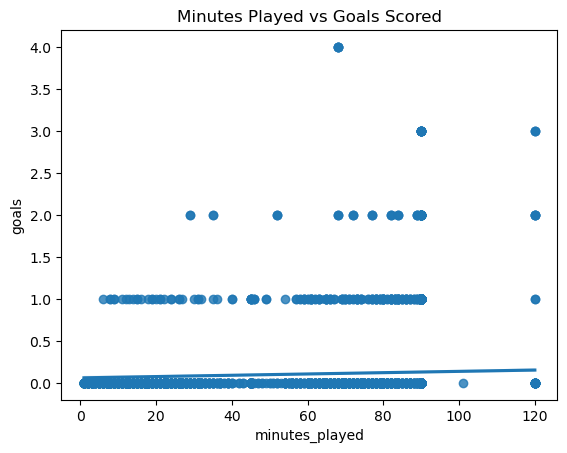

In [51]:
# What is the relationship between minutes_played & goals scored by a player?

correlation = df_football['minutes_played'].corr(df_football['goals'])
print("Correlation minutes_played and goals:",correlation)

sns.regplot(x='minutes_played', y='goals', data=df_football)
plt.title('Minutes Played vs Goals Scored')
plt.show()

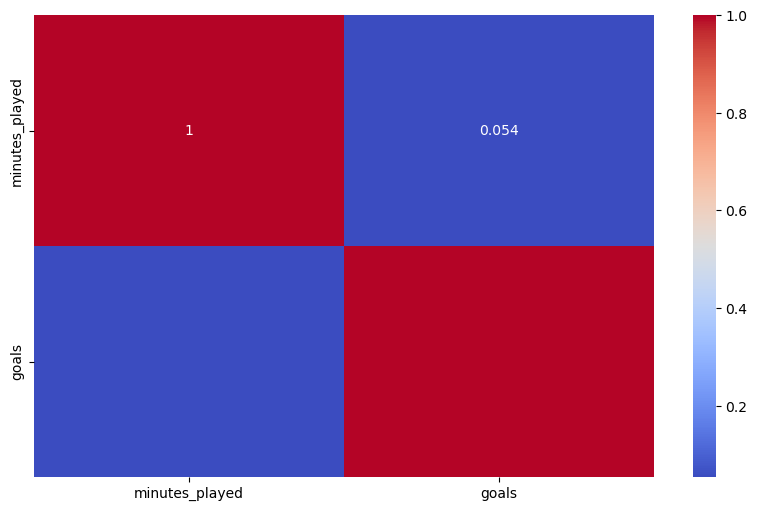

In [52]:
# What is the relationship between minutes_played & goals scored by a player?

corr_matrix = df_football[['minutes_played', 'goals']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [53]:
# Calculate goal-scoring rate per minute
df_football['goal_scoring_rate'] = df_football['goals'] / df_football['minutes_played']

# Sort by goal-scoring rate in descending order
df_football.sort_values(by='goal_scoring_rate', ascending=False, inplace=True)
top_players = df_football[['player_name_x', 'goal_scoring_rate']].head(10)

print(top_players)

          player_name_x  goal_scoring_rate
2257        Kenny Saief           0.166667
2259        Kenny Saief           0.125000
3732       Timothy Weah           0.125000
765    Timothy Chandler           0.111111
1770   Alejandro Bedoya           0.111111
2822  Christian Pulisic           0.090909
1471    Michael Bradley           0.083333
2320             Jordan           0.076923
4034       Josh Sargent           0.071429
3848       Seyi Adekoya           0.068966


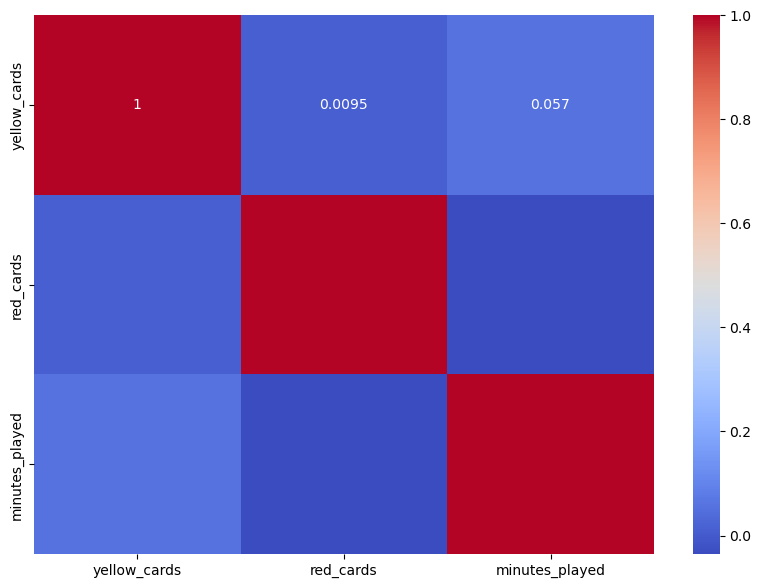

In [54]:
# .How do yellow_cards and red_cards correlate with the minutes_played in a match?
corr_matrix_cards = df_football[['yellow_cards', 'red_cards','minutes_played']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(data=corr_matrix_cards, annot=True, cmap='coolwarm')
plt.show()


Correlation between minutes played and yellow cards: 0.0566160699650641
Correlation between minutes played and red cards: -0.035650197675469016


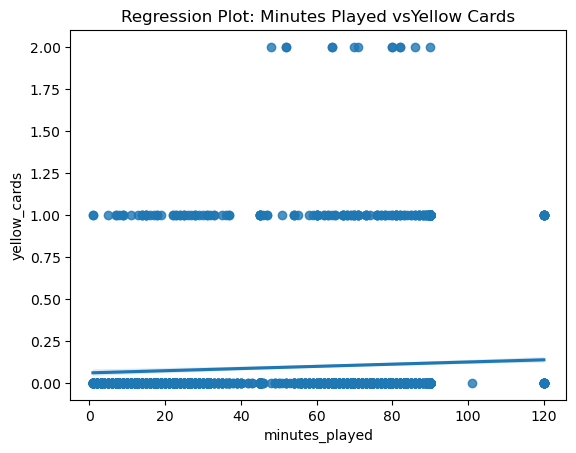

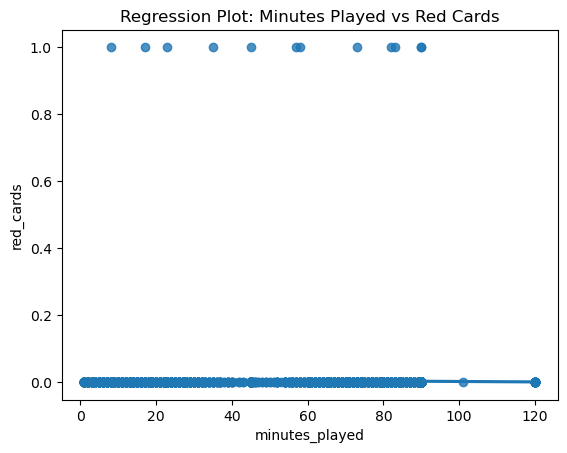

In [55]:
# Correlation between minutes played and yellow cards

correlation_yellow = df_football['minutes_played'].corr(df_football['yellow_cards'])
print("Correlation between minutes played and yellow cards:",correlation_yellow)

# Correlation between minutes played and red cards
correlation_red = df_football['minutes_played'].corr(df_football['red_cards'])
print("Correlation between minutes played and red cards:",correlation_red)


# Regression plots
sns.regplot(x='minutes_played', y='yellow_cards', data=df_football)
plt.title('Regression Plot: Minutes Played vsYellow Cards')
plt.show()

sns.regplot(x='minutes_played', y='red_cards', data=df_football)
plt.title('Regression Plot: Minutes Played vs Red Cards')
plt.show()

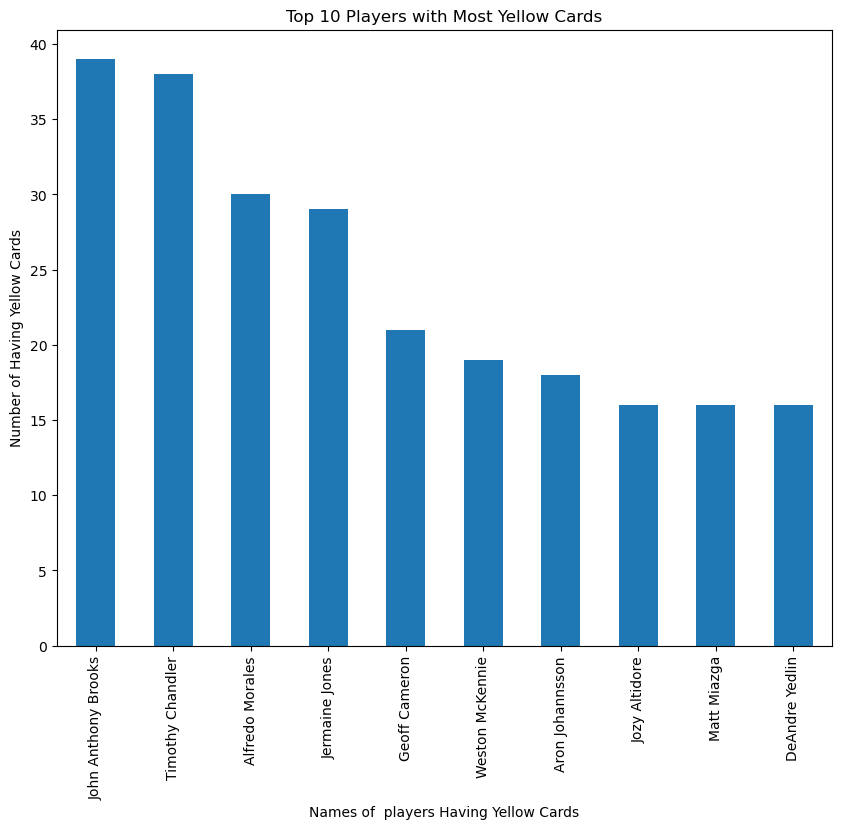

In [56]:
#4.find the top 10 players on yellow cards
players_yellow_cards=df_football.groupby('player_name_x')['yellow_cards'].sum()

top10_yellow_cards = players_yellow_cards.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
top10_yellow_cards .plot(kind='bar')
plt.xlabel('Names of  players Having Yellow Cards')
plt.ylabel('Number of Having Yellow Cards')
plt.title('Top 10 Players with Most Yellow Cards')
plt.xticks(rotation=90)  
plt.show()



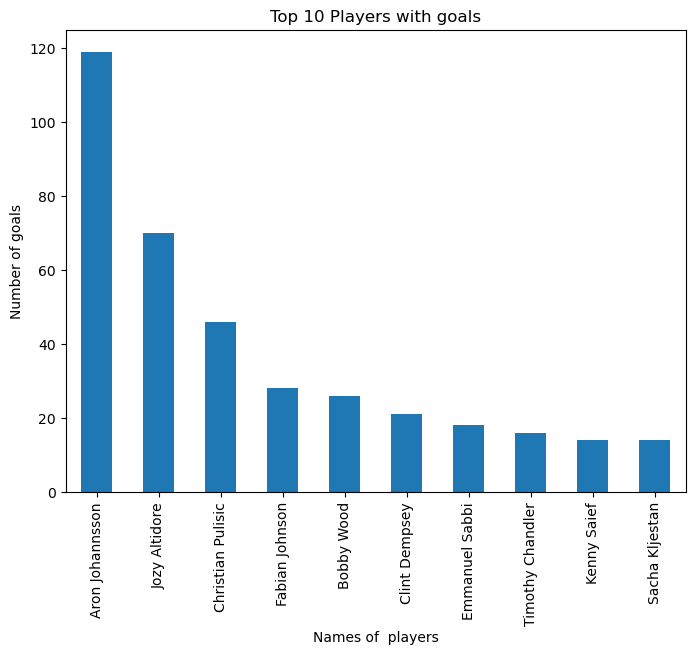

In [57]:
# .Find the Top 10 players based on  goals?

players_goals=df_football.groupby('player_name_x')['goals'].sum()
top_players_goals=players_goals .sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
top_players_goals.plot(kind='bar')
plt.xlabel('Names of  players')
plt.ylabel('Number of goals')
plt.title('Top 10 Players with goals')
plt.xticks(rotation=90)  
plt.show()


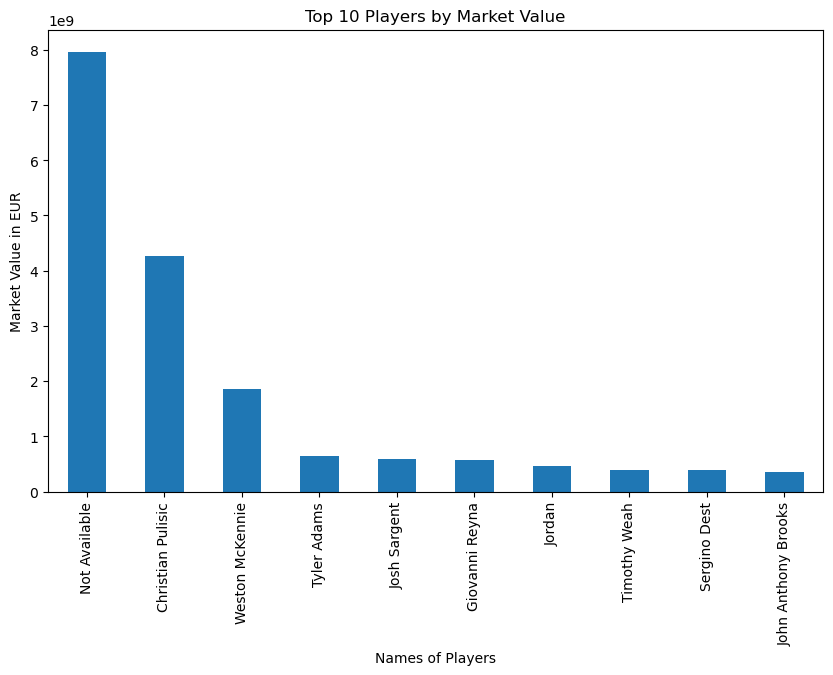

In [58]:
#.Top 10 players based on Market value ?

total_value_in_eur_per_player = df_football.groupby('player_name_x')['market_value_in_eur'].sum()


# Select top 10 players by market value
top_players_market_value = total_value_in_eur_per_player.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_players_market_value.plot(kind='bar')
# Set plot labels and title
plt.xlabel('Names of Players')
plt.ylabel('Market Value in EUR')
plt.title('Top 10 Players by Market Value')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [59]:
# prat3

# Calculate conditional probability: P(Goal | Minutes > 60)

total_players = df_football.shape[0]
players_played_over_60 = df_football[df_football['minutes_played'] > 60]
players_scored_goals = df_football[df_football['goals'] > 0]

# Conditional probability: P(Goal | Minutes > 60)
players_scored_over_60 = players_played_over_60[players_played_over_60['goals'] > 0]
conditional_probability = len(players_scored_over_60) / len(players_played_over_60)
print("P(Goal | Minutes > 60):", conditional_probability)


P(Goal | Minutes > 60): 0.10059652928416486


In [60]:
# Random sample of 100 players
sampled_data = df_football.sample(n=100)

# Calculate average market value in EUR
average_market_value = sampled_data['market_value_in_eur'].mean()
print("Average Market Value (Sample of 100 players):" ,average_market_value)


Average Market Value (Sample of 100 players): 3986500.0


In [61]:
# Joint probability: P(Yellow Card and Assist)

players_yellow_and_assist = df_football[(df_football['yellow_cards'] > 0) & (df_football['assists'] > 0)]
joint_probability = len(players_yellow_and_assist) / total_players
print("P(Yellow Card and Assist):",joint_probability)


P(Yellow Card and Assist): 0.006446067898581865


In [62]:
# Number of players who played more than 60 minutes

players_played_over_60 = len(df_football[df_football['minutes_played'] > 60])

# Number of players who scored and played more than 60 minutes
players_scored_and_played_over_60 = len(df_football[(df_football['goals'] > 0) & (df_football['minutes_played'] > 60)])

# Total number of players
total_players = df_football.shape[0]

# Calculate P(A | B)
conditional_probability = players_scored_and_played_over_60 / players_played_over_60
print("P(Scoring a Goal | Played over 60 minutes): ",conditional_probability)


P(Scoring a Goal | Played over 60 minutes):  0.10059652928416486


In [63]:
df_football

,date,player_name_x,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,...,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,goal_scoring_rate
2257,2016-11-19 00:00:00,Kenny Saief,0.0,0.0,1.0,0.0,6.0,2016.0,15. Matchday,0.0,...,1993-12-17,Right Winger,Attack,left,176.0,700000.0,3500000.0,2024-06-30 00:00:00,Not Available,0.166667
2259,2016-11-27 00:00:00,Kenny Saief,0.0,0.0,1.0,0.0,8.0,2016.0,16. Matchday,3.0,...,1993-12-17,Right Winger,Attack,left,176.0,700000.0,3500000.0,2024-06-30 00:00:00,Not Available,0.125000
3732,2018-08-12 00:00:00,Timothy Weah,1.0,0.0,1.0,0.0,8.0,2018.0,1. Matchday,3.0,...,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30 00:00:00,BS Group - BS Law,0.125000
765,2020-05-26 00:00:00,Timothy Chandler,0.0,0.0,1.0,0.0,9.0,2019.0,28. Matchday,3.0,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Not Available,0.111111
1770,2013-10-19 00:00:00,Alejandro Bedoya,0.0,0.0,1.0,0.0,9.0,2013.0,10. Matchday,0.0,...,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31 00:00:00,YMU Group,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,2016-01-19 00:00:00,Brad Guzan,0.0,0.0,0.0,0.0,90.0,2015.0,Third Round Replay,2.0,...,1984-09-09,Goalkeeper,Goalkeeper,left,193.0,100000.0,5000000.0,2023-12-31 00:00:00,YMU Group,0.000000
1661,2016-01-30 00:00:00,Brad Guzan,0.0,0.0,0.0,0.0,90.0,2015.0,Fourth Round,0.0,...,1984-09-09,Goalkeeper,Goalkeeper,left,193.0,100000.0,5000000.0,2023-12-31 00:00:00,YMU Group,0.000000
1662,2016-03-01 00:00:00,Brad Guzan,0.0,0.0,0.0,0.0,90.0,2015.0,28. Matchday,1.0,...,1984-09-09,Goalkeeper,Goalkeeper,left,193.0,100000.0,5000000.0,2023-12-31 00:00:00,YMU Group,0.000000
1663,2016-03-05 00:00:00,Brad Guzan,0.0,0.0,0.0,0.0,90.0,2015.0,29. Matchday,4.0,...,1984-09-09,Goalkeeper,Goalkeeper,left,193.0,100000.0,5000000.0,2023-12-31 00:00:00,YMU Group,0.000000


In [64]:
import scipy.stats as sts

In [65]:
def mystats(mytable):
        print("kurtosis is:",sts.kurtosis(mytable.market_value_in_eur))
        print("Skewness is:",sts.skew(mytable.market_value_in_eur))
        print("Mean is:",mytable.market_value_in_eur.mean())
        print("Mode is:",mytable.market_value_in_eur.mode()[0])
        print("Median is:",mytable.market_value_in_eur.median())
        print("Standard Devation is:",mytable.market_value_in_eur.std())

mystats(df_football)     


kurtosis is: 2.4302936681632623
Skewness is: 1.9748653878370355
Mean is: 4355189.084658358
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7315236.571855881


In [66]:
df_football.shape

(4654, 34)

kurtosis is: 1.7386369925802478
Skewness is: 1.7154611706277931
Mean is: 4808000.0
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7062905.374081711


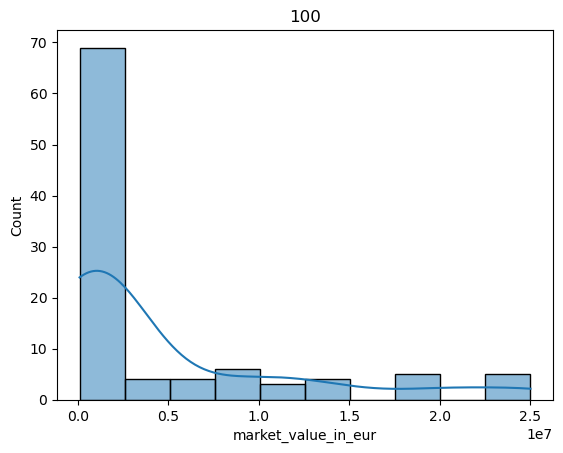

****************************************************************************************************
kurtosis is: 2.2619233013603806
Skewness is: 1.9377286265254885
Mean is: 4384800.0
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7330422.166442841


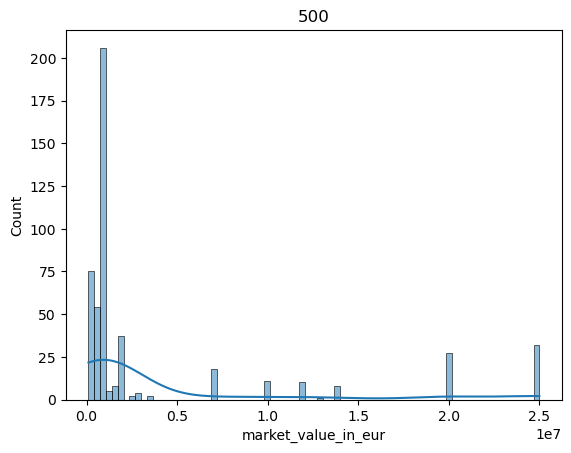

****************************************************************************************************
kurtosis is: 2.3151003290615053
Skewness is: 1.9498397072967752
Mean is: 4384175.0
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7353584.01680884


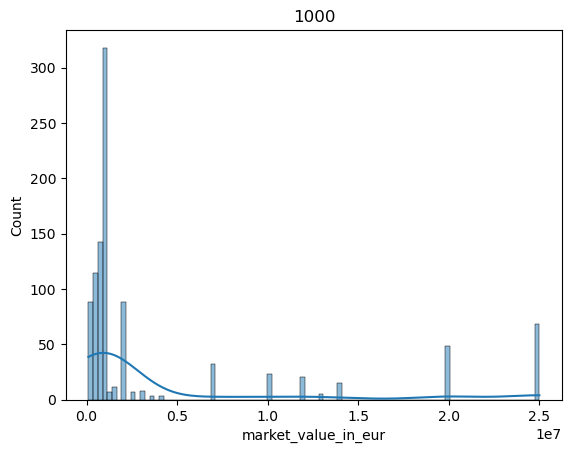

****************************************************************************************************
kurtosis is: 2.4919016188159544
Skewness is: 1.9888997676856555
Mean is: 4347866.666666667
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7320550.064787204


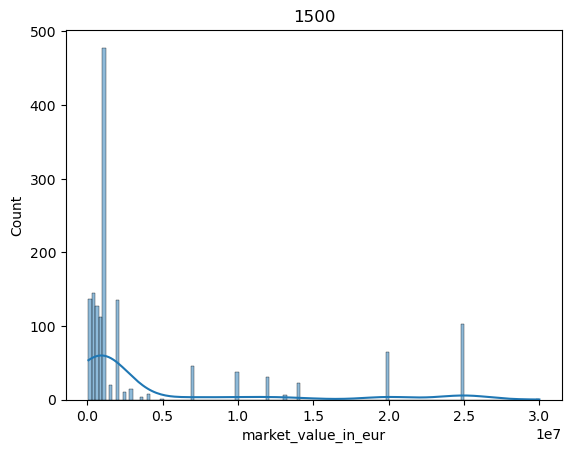

****************************************************************************************************
kurtosis is: 2.544386664118065
Skewness is: 1.9974906790764295
Mean is: 4316475.0
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7256493.043821106


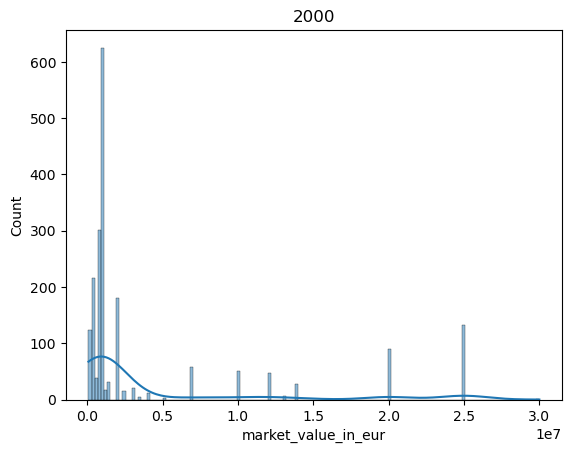

****************************************************************************************************
kurtosis is: 2.5712310534654366
Skewness is: 2.0029452586420504
Mean is: 4307180.0
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7253000.3690432375


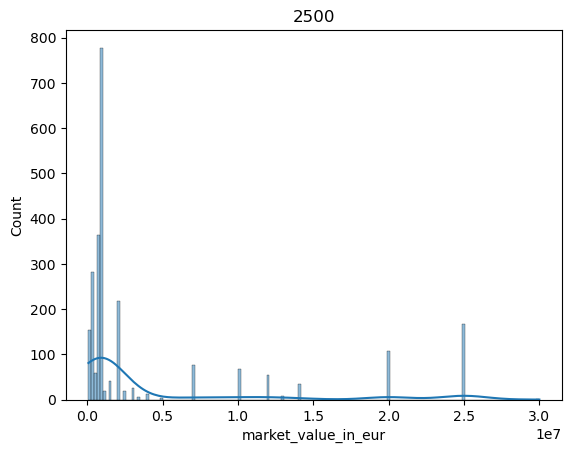

****************************************************************************************************
kurtosis is: 2.449523072695599
Skewness is: 1.9781087343730748
Mean is: 4359033.333333333
Mode is: 1000000.0
Median is: 1000000.0
Standard Devation is: 7312539.67928215


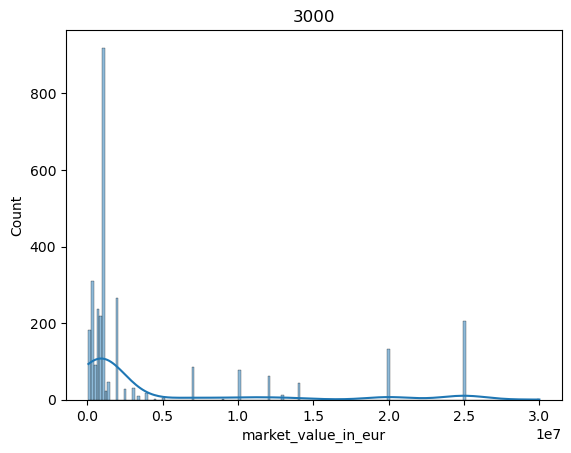

****************************************************************************************************


In [67]:
# central limit theoram


s_100=df_football.sample(n=100,random_state=42,replace=False)

s_500=df_football.sample(n=500,random_state=42,replace=False)

s_1000=df_football.sample(n=1000,random_state=42,replace=False)

s_1500=df_football.sample(n=1500,random_state=42,replace=False)

s_2000=df_football.sample(n=2000,random_state=42,replace=False)

s_2500=df_football.sample(n=2500,random_state=42,replace=False)

s_3000=df_football.sample(n=3000,random_state=42,replace=False)

#s_800=df_football.sample(n=800,random_state=42,replace=False)



samples=[s_100,s_500,s_1000,s_1500,s_2000,s_2500,s_3000]

for each_stat in samples:
    mystats(each_stat)
    sns.histplot(each_stat.market_value_in_eur,kde=True)
    plt.title(len(each_stat))
    plt.show()
    print("*"*100)


In [68]:
conti_df.columns

Index(['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'home_club_goals', 'away_club_goals', 'attendance',
       'last_season', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [69]:
conti_df.shape

(4654, 13)

In [70]:
df_football.shape

(4654, 34)

In [71]:
df_football.columns

Index(['date', 'player_name_x', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'goal_scoring_rate'],
      dtype='object')

In [72]:
conti_df.shape

(4654, 13)

In [73]:
conti_df.columns

Index(['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'home_club_goals', 'away_club_goals', 'attendance',
       'last_season', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [74]:
for col in conti_df:
    if col in df_football.columns:
        df_football[col]= df_football[col].fillna(df_football[col].median())


In [75]:
for col in cate_df:
    if col in df_football.columns:
        df_football[col] = df_football[col].fillna('Not Available')


In [76]:
columns=conti_df[['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'home_club_goals', 'away_club_goals', 'attendance',
       'last_season', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur']]

In [77]:
# Scalling columns

scaler = MinMaxScaler()
for i in conti_df:
    df_football[i] = scaler.fit_transform(conti_df[i].to_numpy().reshape(-1, 1))


In [78]:
df_football.columns

Index(['date', 'player_name_x', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'goal_scoring_rate'],
      dtype='object')

In [79]:
df_football.dtypes

date                                   object
player_name_x                          object
yellow_cards                          float64
red_cards                             float64
goals                                 float64
assists                               float64
minutes_played                        float64
season                                float64
round                                  object
home_club_goals                       float64
away_club_goals                       float64
home_club_manager_name                 object
away_club_manager_name                 object
stadium                                object
attendance                            float64
referee                                object
home_club_name                         object
away_club_name                         object
aggregate                              object
competition_type                       object
name                                   object
last_season                       

In [80]:
df_football.isnull().sum()

date                              0
player_name_x                     0
yellow_cards                    932
red_cards                       932
goals                           932
assists                         932
minutes_played                  932
season                          928
round                             0
home_club_goals                 928
away_club_goals                 928
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                     1064
referee                           0
home_club_name                    0
away_club_name                    0
aggregate                         0
competition_type                  0
name                              0
last_season                       0
player_code                       0
country_of_birth                  0
date_of_birth                     0
sub_position                      0
position_y                        0
foot                        

In [81]:
# Yellow card = warning (two yellows = red)
# Red card = automatic dismissal from the match and playing with one fewer

In [82]:
#ML Agorithams Analysis:-
# Based on performance Analysis:-

In [83]:
# predict whether a player will receive a card (yellow or red) based on match histarical data.

In [84]:
#df_football['received_card'] =  df_football['received_card'].astype(bool)


In [85]:
#df_football.apply(lambda x:1 if(x['yellow']>0 or x['red']>0) else 0,axis=1)

In [86]:

# part 4
#  whether a player received any card

df_football['received_card'] = df_football.apply(lambda x: 1 if (x['yellow_cards'] > 0 or x['red_cards'] > 0) else 0, axis=1)

for col in conti_df:
    if col in df_football.columns:
        df_football[col]= conti_df[col].fillna(conti_df[col].median())
        
#astype conversion
df_football['received_card'] =  df_football['received_card'].astype(bool)

X1 = df_football[['minutes_played', 'last_season', 'market_value_in_eur']] # Features  selection
Y1 = df_football['received_card']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, train_size=0.8, random_state=42)

log_reg_model = LogisticRegression()

log_reg_model.fit(X1_train, y1_train)
print('Training performance',log_reg_model.score(X1_train, y1_train))

y1_pred = log_reg_model.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("accuracy score",accuracy)
print("recall", recall_score(y1_test, y1_pred, average ="weighted"))
print("f1_score",f1_score(y1_test, y1_pred,average ="weighted"))

print("precision score", precision_score(y1_test, y1_pred, average ="weighted"))


Training performance 0.889873757722267
accuracy score 0.907626208378088
recall 0.907626208378088
f1_score 0.8636758401795995
precision score 0.8237853341347846


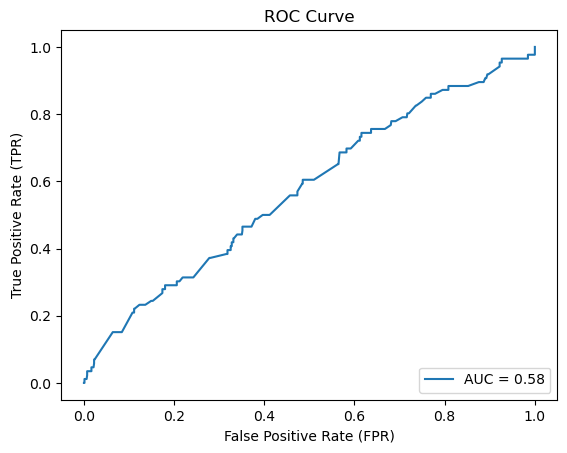

In [87]:
y1_prob =log_reg_model.predict_proba(X1_test)[:,1]

fpr, tpr, _ = roc_curve(y1_test, y1_prob)

roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")  
plt.show()


In [88]:
df_football['received_card'].unique()

array([False,  True])

In [89]:
#VALIDATION ON TEST FILE
test_df=pd.read_excel("test data (1).xlsx")
test_df


,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [90]:
test_df=pd.read_excel("test data (1).xlsx")
test_df_new=test_df.copy()

In [91]:
test_df_new

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [92]:
# droppping the id columns because no need to ML for id's
# For testing no need to these columns


test_df_new.drop(['Unnamed: 0','appearance_id',	'game_id',	'player_id','current_club_id','competition_id','game_event_id','player_in_id','game_lineups_id'],axis=1,inplace=True)

In [93]:
# preprocessing the file


test_df_new['received_card'] =  test_df_new.apply(lambda x: 1 if (x['yellow_cards'] > 0 or x['red_cards'] > 0) else 0, axis=1)
test_df_new['received_card'] =  test_df_new['received_card'].astype(bool)

In [94]:
test_df_new.to_csv("test_new_file.csv")

In [95]:
test_df_new['yellow_cards'].unique()

array([0], dtype=int64)

In [96]:
test_df_new

,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,type_y,number,player_name,team_captain,position_y,received_card
0,0,0,0,0,58,2020,2. Matchday,4,0,8,...,177,3000000,3000000,2026-06-30,starting_lineup,14,Luca de la Torre,0,Right Midfield,False
1,0,0,0,0,58,2020,2. Matchday,4,0,8,...,177,3000000,3000000,2026-06-30,substitutes,14,Luca de la Torre,0,Central Midfield,False


In [97]:
test_df_new.isnull().sum()

yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
date                           0
minute                         0
type_x                         0
name                           0
last_season                    0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position_x                     0
foot      

In [98]:
conti_val=test_df_new.select_dtypes(include='number')
print("continous numbers are:",conti_val.columns.to_list())

continous numbers are: ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played', 'season', 'home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position', 'attendance', 'minute', 'last_season', 'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur', 'number', 'team_captain']


In [99]:
scaler = MinMaxScaler()
for val_col in conti_val:
     test_df_new[val_col] = scaler.fit_transform(conti_val[val_col].to_numpy().reshape(-1,1))


In [100]:
test_df_new

,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,type_y,number,player_name,team_captain,position_y,received_card
0,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,0.0,2026-06-30,starting_lineup,0.0,Luca de la Torre,0.0,Right Midfield,False
1,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,0.0,2026-06-30,substitutes,0.0,Luca de la Torre,0.0,Central Midfield,False


In [101]:
test_df_new['received_card'].unique()

array([False])

In [102]:

columns_val=test_df_new[['minutes_played', 'last_season', 'market_value_in_eur','received_card']]

x1=df_football[['minutes_played','last_season','market_value_in_eur']]
y1=df_football[['received_card']]

#splitting
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=42)

print(y1_train.value_counts())
print(y1_test.value_counts())

log_reg_model_one = LogisticRegression() # here using  a training model

log_reg_model_one.fit(x1_train, y1_train)
print('Training performance',log_reg_model_one.score(x1_train, y1_train))

# Predict and evaluate the model
y1_pred = log_reg_model_one.predict(x1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print("accuracy score",accuracy)
print("recall", recall_score(y1_test, y1_pred, average ="weighted"))
print("f1_score",f1_score(y1_test, y1_pred,average ="weighted"))

print("precision score", precision_score(y1_test, y1_pred, average ="weighted"))

# now use x_val and y_val to .transform() and .predict()
# test data file here using

x_val=test_df_new[['minutes_played','last_season','market_value_in_eur']]

y_val=test_df_new[['received_card']]

#x_val_train, x_val_test, y_val_train, y_val_train = train_test_split(x_val, y_val, train_size=0.8, random_state=42) this only for main table not for validation file

#log_reg_model_one = LogisticRegression() 

#log_reg_model_one.transform(x_val_train, y_val_train)

val_y_pred = log_reg_model_one.predict(x_val)

print(val_y_pred)


received_card
False            3313
True              410
Name: count, dtype: int64
received_card
False            845
True              86
Name: count, dtype: int64
Training performance 0.889873757722267
accuracy score 0.907626208378088
recall 0.907626208378088
f1_score 0.8636758401795995
precision score 0.8237853341347846
[False False]


In [103]:
val_y_pred

array([False, False])

# Validation Sucessful

In [104]:
print("*"*150)

******************************************************************************************************************************************************


# player performance And Market Vlaue

# predict the market value based on histarical data
   # linear regression

# simple linear regression

# MISSING VALUE TREATMENT:-

for col in conti_df:
    if col in df_football.columns:
        df_football[col]= df_football[col].fillna(df_football[col].median())

# not 
X = df_football[['last_season']]
Y = df_football[['market_value_in_eur']]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Train the model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Check training performance
train_performance = lin_reg_model.score(X_train, y_train)  # No need for .to_numpy() or .predict here
print("Training Performance:", train_performance)

# Predictions on the test data
y_pred = lin_reg_model.predict(X_test)

test_performance = lin_reg_model.score(X_test, y_test)
print("Test Performance :", test_performance)


In [105]:
# part5

conti_vif=df_football[['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'home_club_goals', 'away_club_goals', 'attendance',
       'last_season', 'height_in_cm']]

In [106]:
# based on vif score no need to  "market value in" 
# so i'm not using  those columns because it's traget

In [107]:

# VIF score Analysis 

def cal_vif(conti_vif):
    vif = pd.Series(name="VIF")
    for i in range(conti_vif.shape[1]):
        vif[conti_df.columns[i]] = variance_inflation_factor(conti_vif.values, i)
    return vif

# Calculate VIF values
vif_values = cal_vif(conti_vif)
print("VIF Values:\n", vif_values)
#filter_values=vif_values[vif_values<=10]
#print("lessthan or eauall to 10 vif score\n",filter_values)

VIF Values:
 yellow_cards            1.127189
red_cards               1.006004
goals                   1.175949
assists                 1.108578
minutes_played          8.635341
season             618033.229739
home_club_goals         2.594549
away_club_goals         2.303803
attendance              4.092750
last_season        616566.068237
height_in_cm          862.485539
Name: VIF, dtype: float64


In [108]:
# vif>=10 all remove all columns
# from domine knowledge height_in_cm,last_season ,season no needed

# from domine knoweldge last_season ,season is very important

In [109]:
# model 1
X1 = df_football[['goals','minutes_played','season','attendance']]
Y1 = df_football[['market_value_in_eur']]

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, train_size=0.7, random_state=42)


lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

train_performance = lin_reg_model.score(X_train, y_train)
print("Training Performance:", train_performance)

y_pred = lin_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Training Performance: 0.14855605919473014
Mean Squared Error: 43445674178619.99
Root Mean Squared Error: 6591333.262597181
Mean Absolute Error: 4794792.4592699725
R2 Score: 0.16718064158273116


In [110]:
# from domine knoweldge last seson also very important

In [111]:
# model 2
xx = df_football[['goals','minutes_played','last_season',
                   'away_club_goals','attendance']]

yy = df_football['market_value_in_eur']

xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, train_size=0.7, random_state=42)


# Train the model
lin_reg_model_new = LinearRegression()
lin_reg_model_new.fit(xx_train, yy_train)

train_performance = lin_reg_model_new.score(xx_train, yy_train)
print("Training Performance:", train_performance)

yy_pred = lin_reg_model_new.predict(xx_test)

mse1 = mean_squared_error(yy_test, yy_pred)
rmse1 = mean_squared_error(yy_test, yy_pred, squared=False)
mae1 = mean_absolute_error(yy_test, yy_pred)
r2_new = r2_score(yy_test, yy_pred)

print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse1)
print("Mean Absolute Error:", mae1)
print("R2 Score:", r2_new)



Training Performance: 0.264038393633917
Mean Squared Error: 38093100032538.54
Root Mean Squared Error: 6171960.793178983
Mean Absolute Error: 4566368.776896104
R2 Score: 0.269785272549975


In [112]:
# based on domine knoweldge  taken last_season column

In [113]:
df_football.columns

Index(['date', 'player_name_x', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'goal_scoring_rate', 'received_card'],
      dtype='object')

In [114]:
# model 3

xxx = df_football[['goals','last_season','minutes_played','home_club_goals',
                   'away_club_goals','height_in_cm', 'attendance']]

yyy = df_football[['market_value_in_eur']]

xxx_train, xxx_test, yyy_train, yyy_test = train_test_split(xxx, yyy, train_size=0.7, random_state=42)

# Scaling
scaler = MinMaxScaler()
xxx_train_scaled = scaler.fit_transform(xxx_train)
xxx_test_scaled = scaler.transform(xxx_test)

lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(xxx_train_scaled, yyy_train)

train_performance = lin_reg_model1.score(xxx_train_scaled, yyy_train)
print("Training Performance:", train_performance)

yyy_pred = lin_reg_model1.predict(xxx_test_scaled)

mse2 = mean_squared_error(yyy_test, yyy_pred)
rmse2 = mean_squared_error(yyy_test, yyy_pred, squared=False)
mae2 = mean_absolute_error(yyy_test, yyy_pred)
r2_new1 = r2_score(yyy_test, yyy_pred)

print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("Mean Absolute Error:", mae2)
print("R2 Score:", r2_new1)
print("Coefficients:", lin_reg_model1.coef_[0,0])
print("Intercept:", lin_reg_model1.intercept_)
# Model performance  not good


Training Performance: 0.2841544103542194
Mean Squared Error: 36997799354539.07
Root Mean Squared Error: 6082581.635665819
Mean Absolute Error: 4491774.469811101
R2 Score: 0.2907813239445327
Coefficients: 1617572.0706713651
Intercept: [-584900.93879464]


# validatio test file (taken all values from test file)


In [115]:
x_val1 = test_df_new[['goals','last_season','minutes_played','home_club_goals',
                   'away_club_goals','height_in_cm', 'attendance']]

y_val1 = test_df_new[['market_value_in_eur']]


val_y_pred1 = lin_reg_model1.predict(x_val1)

print(val_y_pred1)

[[-584900.93879464]
 [-584900.93879464]]


# model performane not good  so, it is not used for predicting future.

# Validation Test is failed 

In [116]:
# my model 3 performance is  not good compare to others

In [117]:
# VALIDATION IS NOT SUCCESS

# KNN classification 
# predicts competation based histarical data like attadence ,minutes 
# Attendance & Stadium Analysis:


In [118]:
# KNN-how many neighbours should we take pick a value of K
# k should give us high performance
# k should give us less error
# performance is should stable

In [119]:
df_football.dtypes

date                                   object
player_name_x                          object
yellow_cards                          float64
red_cards                             float64
goals                                 float64
assists                               float64
minutes_played                        float64
season                                float64
round                                  object
home_club_goals                       float64
away_club_goals                       float64
home_club_manager_name                 object
away_club_manager_name                 object
stadium                                object
attendance                            float64
referee                                object
home_club_name                         object
away_club_name                         object
aggregate                              object
competition_type                       object
name                                   object
last_season                       

In [120]:
df_football['contract_expiration_date'].unique()

array([Timestamp('2024-06-30 00:00:00'), Timestamp('2028-06-30 00:00:00'),
       Timestamp('2025-06-30 00:00:00'), Timestamp('2023-12-31 00:00:00'),
       Timestamp('2027-06-30 00:00:00'), 'Not Available',
       Timestamp('2024-12-31 00:00:00'), Timestamp('2026-06-30 00:00:00'),
       Timestamp('2023-11-30 00:00:00'), Timestamp('2025-12-31 00:00:00'),
       Timestamp('2026-05-31 00:00:00'), Timestamp('2027-12-31 00:00:00'),
       Timestamp('2023-06-30 00:00:00'), Timestamp('2024-05-31 00:00:00'),
       Timestamp('2023-05-31 00:00:00'), Timestamp('2026-12-31 00:00:00')],
      dtype=object)

In [121]:
df_football=df_football.loc[df_football['contract_expiration_date']!='Not Available']

In [122]:
#df_football['contract_expiration_date']=df_football['contract_expiration_date'].astype(bool)
df_football['contract_expiration_date'].unique()

array([Timestamp('2024-06-30 00:00:00'), Timestamp('2028-06-30 00:00:00'),
       Timestamp('2025-06-30 00:00:00'), Timestamp('2023-12-31 00:00:00'),
       Timestamp('2027-06-30 00:00:00'), Timestamp('2024-12-31 00:00:00'),
       Timestamp('2026-06-30 00:00:00'), Timestamp('2023-11-30 00:00:00'),
       Timestamp('2025-12-31 00:00:00'), Timestamp('2026-05-31 00:00:00'),
       Timestamp('2027-12-31 00:00:00'), Timestamp('2023-06-30 00:00:00'),
       Timestamp('2024-05-31 00:00:00'), Timestamp('2023-05-31 00:00:00'),
       Timestamp('2026-12-31 00:00:00')], dtype=object)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

indep = df_football[['goals','minutes_played','height_in_cm','attendance']]

date_cutoff =pd.to_datetime('2024-08-19 00:00:00')

df_football['Contract_Expire_Or_Not']= df_football.apply(lambda x:1 if(x['contract_expiration_date']>date_cutoff) else 0,axis=1)

df_football['Contract_Expire_Or_Not']=df_football['Contract_Expire_Or_Not'].astype(bool)

dep = df_football['Contract_Expire_Or_Not']

X_train1, X_test1, y_train1, y_test1 = train_test_split(indep, dep, train_size=0.8, random_state=42)


# To figure out the initial value of k - square root of the number of rows
my_k = int(round(len(X_train1)**0.5))
print("Length of X_train1:", len(X_train1))
print("Initial value of k:", my_k)

performance = []
k_option = np.arange(50, 100, 10)  
for which_k in k_option:
    temp_model = KNeighborsClassifier(n_neighbors=which_k)
    temp_model.fit(X_train1, y_train1)
    temp_model.score(X_train1, y_train1)
    y_predict = temp_model.predict(X_test1)
    # Accuracy score
    accuracy = accuracy_score(y_test1, y_predict) * 100
    print("if k is",which_k,"performance",accuracy_score(y_test1, y_predict)*100)
    performance.append(accuracy)


Length of X_train1: 2572
Initial value of k: 51
if k is 50 performance 72.51552795031056
if k is 60 performance 72.04968944099379
if k is 70 performance 70.4968944099379
if k is 80 performance 71.11801242236024
if k is 90 performance 70.96273291925466


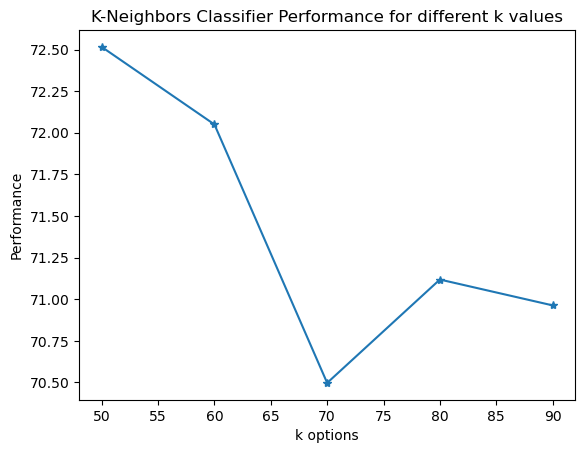

In [124]:
plt.plot(k_option, performance, marker="*")
plt.xlabel("k options")
plt.ylabel("Performance")
plt.title("K-Neighbors Classifier Performance for different k values")
plt.show()



In [125]:
# Final model with the chosen value of k  60
final_model_one = neighbors.KNeighborsClassifier(60)
final_model_one.fit(X_train1, y_train1)
final_model_one.score(X_train1, y_train1)


y_predict = final_model_one.predict(X_test1)
final_accuracy = accuracy_score(y_test1, y_predict) * 100
print("If k is 60, the performance is: final_accuracy",final_accuracy)





If k is 60, the performance is: final_accuracy 72.04968944099379


In [126]:
print(final_model_one.score(X_train1, y_train1))


0.7111197511664075


In [127]:
# F1_score
print("f1_score is:",f1_score(y_test1, y_predict,average ="weighted"))

f1_score is: 0.711965579425312


In [128]:
# recall and precision values

print("recall", recall_score(y_test1, y_predict, average ="weighted"))

print("precision score", precision_score(y_test1, y_predict, average ="weighted"))

recall 0.7204968944099379
precision score 0.7187776414348945


In [129]:
final_model_one.classes_

array([False,  True])

In [130]:
final_model_one.n_neighbors

60

In [131]:
date_cutoff_test =pd.to_datetime('2024-08-19 00:00:00')

test_df_new['Contract_Expire_Or_Not'] =  test_df_new.apply(lambda x: 1 if (x['contract_expiration_date'] >date_cutoff_test ) else 0, axis=1)

test_df_new['Contract_Expire_Or_Not']=   test_df_new['Contract_Expire_Or_Not'].astype(bool)

In [132]:

test_df_new

,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,...,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,type_y,number,player_name,team_captain,position_y,received_card,Contract_Expire_Or_Not
0,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,2026-06-30,starting_lineup,0.0,Luca de la Torre,0.0,Right Midfield,False,True
1,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,2026-06-30,substitutes,0.0,Luca de la Torre,0.0,Central Midfield,False,True


In [133]:
#test_df_new['Contract_Expire_Or_Not']=label_enc.fit_transform(test_df_new['Contract_Expire_Or_Not'])

In [134]:
test_df_new.isnull().sum()

yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
date                           0
minute                         0
type_x                         0
name                           0
last_season                    0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position_x                     0
foot      

In [135]:
test_df_new

,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,...,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,type_y,number,player_name,team_captain,position_y,received_card,Contract_Expire_Or_Not
0,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,2026-06-30,starting_lineup,0.0,Luca de la Torre,0.0,Right Midfield,False,True
1,0.0,0.0,0.0,0.0,0.0,0.0,2. Matchday,0.0,0.0,0.0,...,0.0,0.0,2026-06-30,substitutes,0.0,Luca de la Torre,0.0,Central Midfield,False,True


In [136]:
x_val_test = test_df_new[['goals', 'minutes_played','height_in_cm', 'attendance']]

y_val_test = test_df_new[['Contract_Expire_Or_Not']]


y_pred_new = final_model_one.predict(x_val_test)

print(y_pred_new)
# here Label encoding happing so 

[ True  True]


# Validation Sucessful

In [137]:
df_football.columns

Index(['date', 'player_name_x', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_y',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'goal_scoring_rate', 'received_card', 'Contract_Expire_Or_Not'],
      dtype='object')

 # KNN REGRESSOR

Length of X_train1: 2572
Initial value of k: 51
If k is 50, R2 score: 32.09%
If k is 50, MSE: 21357849319.64%
If k is 60, R2 score: 30.71%
If k is 60, MSE: 21793077843.07%
If k is 70, R2 score: 28.78%
If k is 70, MSE: 22399324316.02%
If k is 80, R2 score: 28.14%
If k is 80, MSE: 22599346597.13%
If k is 90, R2 score: 27.05%
If k is 90, MSE: 22941868777.27%


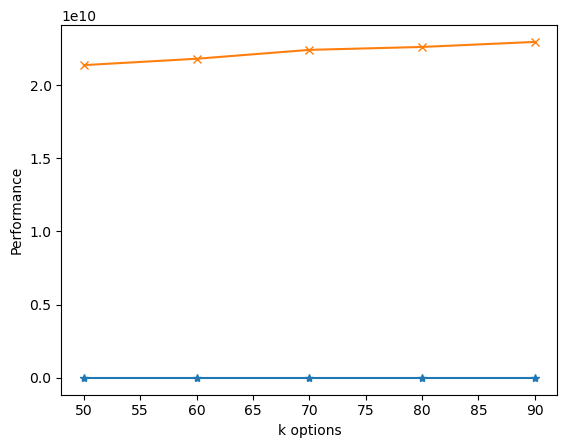

In [138]:

indep1 = df_football[['season', 'goals','last_season','minutes_played',
                   'away_club_goals','highest_market_value_in_eur', 'height_in_cm']]
dep1 = df_football[['attendance']]

# Train and test split
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(indep1, dep1, train_size=0.8, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X1_train_scaled1 = scaler.fit_transform(X1_train1)  
X1_test_scaled1 = scaler.transform(X1_test1)  

my_k = int(round(len(X1_train1) ** 0.5))
print("Length of X_train1:", len(X1_train1))
print("Initial value of k:", my_k)

performance1 = []
performance2 = []

k_options = np.arange(50, 100, 10)
for which_k1 in k_options:
    temp_model1 = neighbors.KNeighborsRegressor(which_k1)
    temp_model1.fit(X1_train_scaled1, y1_train1)
    temp_model1.score(X1_train_scaled1, y1_train1)
    y_predict1 = temp_model1.predict(X1_test_scaled1)
    
    #print("if k is",which_k1,"performance",r2_score(y1_test1,y_predict1)*100)
    #print("if k is",which_k1,"performance",mean_squared_error(y1_test1,y_predict1)*100)
    r2=r2_score(y1_test1,y_predict1)*100
    mse=mean_squared_error(y1_test1,y_predict1)*100
    print(f"If k is {which_k1}, R2 score: {r2:.2f}%")
    print(f"If k is {which_k1}, MSE: {mse:.2f}%")
    performance1.append(r2)
    performance2.append(mse)


#  k options and performance
plt.plot(k_options, performance1, marker="*")
plt.plot(k_options, performance2, marker="x")

plt.xlabel("k options")
plt.ylabel("Performance")
plt.show()


In [139]:
# final k  is 70

final_model1 = neighbors.KNeighborsRegressor(60)
final_model1.fit(X1_train_scaled1, y1_train1)
y_predict1 = final_model1.predict(X1_test_scaled1)
final_r2 = r2_score(y1_test1,y_predict1) * 100
final_mse = mean_squared_error(y1_test1,y_predict1) * 100
print("If k is 60, the performance is: ",final_r2)
print("If k is 60, the performance is: ",final_mse)



If k is 60, the performance is:  30.70502409500573
If k is 60, the performance is:  21793077843.07443


In [140]:
final_model1.n_neighbors

60

In [141]:
# validation Test File

In [142]:
x_val3 = test_df_new[['season', 'goals','last_season','minutes_played',
                   'away_club_goals','highest_market_value_in_eur', 'height_in_cm']]

y_val3 = test_df_new[['attendance']]


val_y_pred3 = final_model1.predict(x_val3)

print(val_y_pred3)

[[29376.95]
 [29376.95]]


# model performane not good  so, it is not used for predicting future.

In [143]:

# VIF score Analysis 

def cal_vif(conti_vif):
    vif = pd.Series(name="VIF")
    for i in range(conti_vif.shape[1]):
        vif[conti_df.columns[i]] = variance_inflation_factor(conti_vif.values, i)
    return vif

# Calculate VIF values
vif_values = cal_vif(conti_vif)
print("VIF Values:\n", vif_values)
#filter_values=vif_values[vif_values<=10]
#print("lessthan or eauall to 10 vif score\n",filter_values)

VIF Values:
 yellow_cards            1.127189
red_cards               1.006004
goals                   1.175949
assists                 1.108578
minutes_played          8.635341
season             618033.229739
home_club_goals         2.594549
away_club_goals         2.303803
attendance              4.092750
last_season        616566.068237
height_in_cm          862.485539
Name: VIF, dtype: float64


# K MEANS ALGORITHAM

In [144]:

for col in conti_df.columns:
      conti_df[col]=conti_df[col].fillna(conti_df[col].median())

In [145]:
conti_df1=conti_df.copy()

In [146]:
df_football1

,date,player_name_x,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2012-07-13 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,90.0,2012.0,1. Matchday,1.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
1,2012-07-19 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,74.0,2012.0,Second Round 1st leg,1.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
2,2012-07-23 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,73.0,2012.0,2. Matchday,0.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
3,2012-07-26 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,43.0,2012.0,Second Round 2nd leg,3.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
4,2012-07-29 00:00:00,Aron Johannsson,0.0,0.0,0.0,0.0,56.0,2012.0,3. Matchday,2.0,...,United States,1990-11-10,Centre-Forward,Attack,right,184.0,400000.0,4000000.0,2024-12-31 00:00:00,CAA Stellar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4649,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,United States,2001-07-28,Attacking Midfield,Midfield,both,180.0,2000000.0,6000000.0,2024-12-31 00:00:00,Octagon
4650,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,United States,2003-02-21,Attacking Midfield,Midfield,right,183.0,75000.0,75000.0,Not Available,PRO FC
4651,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,Germany,2002-05-28,Attacking Midfield,Midfield,right,187.0,5000000.0,5000000.0,2024-06-30 00:00:00,ROOF
4652,Not Available,Not Available,0.0,0.0,0.0,0.0,90.0,2016.0,Not Available,1.0,...,Norway,1990-10-02,Central Midfield,Midfield,right,184.0,400000.0,1400000.0,2024-05-31 00:00:00,Not Available


In [147]:
df_football1=df_football1.drop(['assists','market_value_in_eur','season','height_in_cm','date'],axis=1)

In [148]:
df_football1.isnull().sum()

player_name_x                  0
yellow_cards                   0
red_cards                      0
goals                          0
minutes_played                 0
round                          0
home_club_goals                0
away_club_goals                0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
name                           0
last_season                    0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position_y                     0
foot                           0
highest_market_value_in_eur    0
contract_expiration_date       0
agent_name                     0
dtype: int64

In [149]:
df=df_football1[['highest_market_value_in_eur','last_season']]

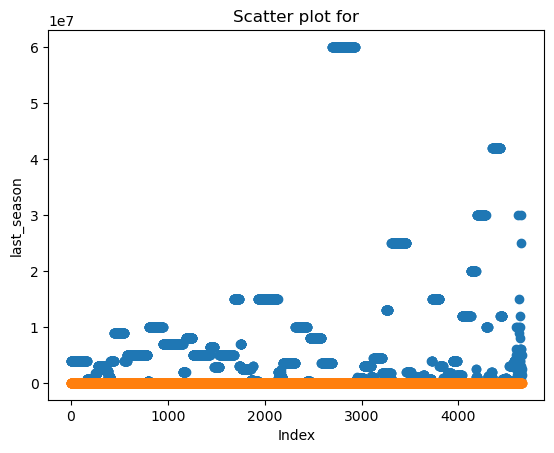

In [150]:
for i in df.columns:
        plt.scatter(df.index,df[i])
plt.xlabel('Index')
plt.ylabel(i)
plt.title('Scatter plot for')
plt.show()
   

In [151]:
# checking the errors using temp model

err=[]
my_cluster=np.arange(2,10)
for j in my_cluster:
    model=KMeans(n_clusters=j)
    model.fit(df)
    err.append(model.inertia_) # inertia



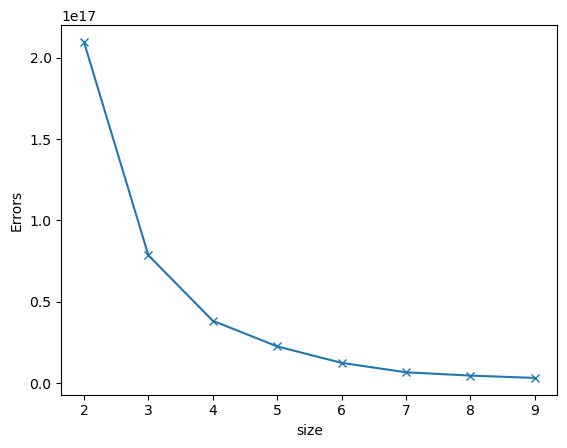

In [152]:
# elbow method (within cluster sum of squared errors)
plt.plot(my_cluster,err,marker="x")
plt.xlabel("size")
plt.ylabel("Errors")
plt.show()

In [153]:
for clust in my_cluster:
    model=KMeans(n_clusters=clust,random_state=42)
    model.fit(df)
    sil_avg=silhouette_score(df,model.labels_)
    print("for n_cluster=",clust, "calinski_harabasz_score is:",calinski_harabasz_score(df,model.labels_)) #  for high value
    print("for n_cluster=",clust, "davies_bouldin_scoreis:",davies_bouldin_score(df,model.labels_)) # for selected low value
    print("*"*100)

for n_cluster= 2 calinski_harabasz_score is: 15505.842528832784
for n_cluster= 2 davies_bouldin_scoreis: 0.24287633737131847
****************************************************************************************************
for n_cluster= 3 calinski_harabasz_score is: 24893.798121291475
for n_cluster= 3 davies_bouldin_scoreis: 0.47204648765692764
****************************************************************************************************
for n_cluster= 4 calinski_harabasz_score is: 35148.30993702042
for n_cluster= 4 davies_bouldin_scoreis: 0.41736092786414014
****************************************************************************************************
for n_cluster= 5 calinski_harabasz_score is: 45455.40205427792
for n_cluster= 5 davies_bouldin_scoreis: 0.3272761165011334
****************************************************************************************************
for n_cluster= 6 calinski_harabasz_score is: 65607.36249693182
for n_cluster= 6 davies_bouldin_scor

In [154]:
# final k is 4
#create final k means model
final_km=KMeans(n_clusters=4,random_state=42)
final_km.fit(df)
final_centroid=final_km.cluster_centers_
print("final centroids are",final_centroid) # centroides for 4 clusters
final_labels=final_km.labels_
print("final labels are",final_labels)# labels for each row
print("errors are",final_km.inertia_) # total of distortion(inerti means errors)
print("for n_cluster=",clust, "calinski_harabasz_score is:",calinski_harabasz_score(df,final_km.labels_)) #  for high value
print("for n_cluster=",clust, "davies_bouldin_scoreis:",davies_bouldin_score(df,final_km.labels_)) # for selected low value


final centroids are [[1.17871957e+07 2.01959603e+03]
 [6.00000000e+07 2.02300000e+03]
 [3.16099095e+06 2.01857814e+03]
 [3.06219512e+07 2.02300000e+03]]
final labels are [2 2 2 ... 2 2 2]
errors are 3.836604677656244e+16
for n_cluster= 9 calinski_harabasz_score is: 35148.30993702042
for n_cluster= 9 davies_bouldin_scoreis: 0.41736092786414014


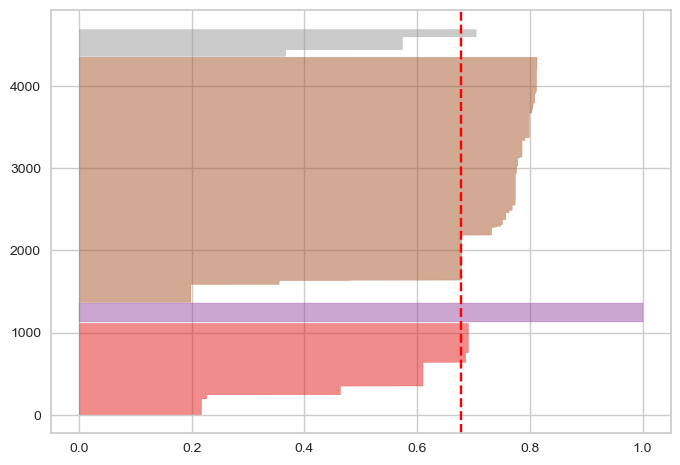

In [155]:
from yellowbrick.cluster import SilhouetteVisualizer
vis=SilhouetteVisualizer(final_km)# where k=4
vis.fit(df);

In [156]:
df=pd.DataFrame(df)
df

,highest_market_value_in_eur,last_season
0,4000000.0,2018
1,4000000.0,2018
2,4000000.0,2018
3,4000000.0,2018
4,4000000.0,2018
...,...,...
4649,6000000.0,2022
4650,75000.0,2021
4651,5000000.0,2023
4652,1400000.0,2020


In [157]:
df["group"]=final_km.labels_

In [158]:
	#yellow_cards	red_cards	goals	minutes_played	home_club_goals	away_club_goals	attendance	last_season	highest_market_value_in_eur           
# blue,red,green,yellow,black,white,gray or grey,cyan,magenta

In [159]:
df

,highest_market_value_in_eur,last_season,group
0,4000000.0,2018,2
1,4000000.0,2018,2
2,4000000.0,2018,2
3,4000000.0,2018,2
4,4000000.0,2018,2
...,...,...,...
4649,6000000.0,2022,2
4650,75000.0,2021,2
4651,5000000.0,2023,2
4652,1400000.0,2020,2


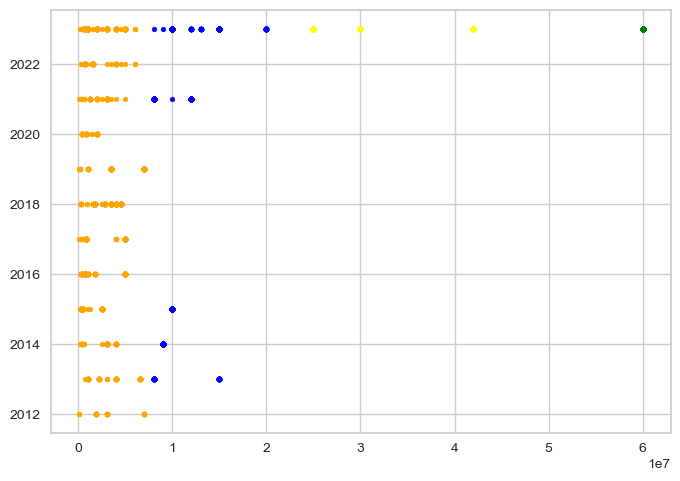

In [160]:
colors1= ['blue','green','orange','yellow']

for m1 in range(4):
    temp1=df[df['group']==m1]
    plt.scatter(temp1['highest_market_value_in_eur'],temp1['last_season'],color=colors1[m1], marker=".")
plt.show()
            

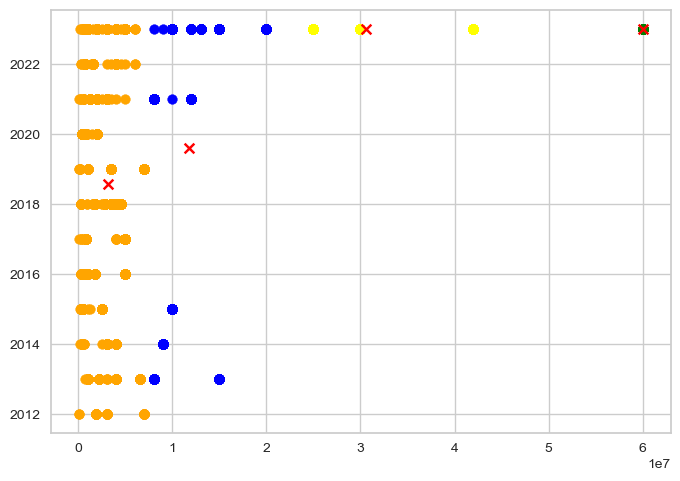

In [161]:

my_colors = ['blue','green','orange','yellow']

# Loop through each column in df_new to create scatter plots
for m in range(4):
    temp=df[df['group']==m]
    plt.scatter(temp['highest_market_value_in_eur'],temp['last_season'],color=my_colors[m], marker='o',)
    plt.scatter(final_km.cluster_centers_[m,0], final_km.cluster_centers_[m,1], color='red', marker='x')
plt.show()